A case study using iris dataset for KNN algorithm

In [4]:
# import modules for this project
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# load iris dataset
iris = datasets.load_iris()
data, labels = iris.data, iris.target

# training testing split
res = train_test_split(data, labels,
                       train_size=0.8,
                       test_size=0.2,
                       random_state=12)
train_data, test_data, train_labels, test_labels = res

# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
# classifier "out of the box", no parameters
knn = KNeighborsClassifier()
knn.fit(train_data, train_labels)

# print some interested metrics
print("Predictions from the classifier:")
learn_data_predicted = knn.predict(train_data)
print(learn_data_predicted)
print("Target values:")
print(train_labels)
print(accuracy_score(learn_data_predicted, train_labels))

# re-do KNN using some specific parameters.
knn2 = KNeighborsClassifier(algorithm='auto',
                            leaf_size=30,
                            metric='minkowski',
                            p=2,         # p=2 is equivalent to euclidian distance
                            metric_params=None,
                            n_jobs=1,
                            n_neighbors=5,
                            weights='uniform')

knn.fit(train_data, train_labels)
test_data_predicted = knn.predict(test_data)
accuracy_score(test_data_predicted, test_labels)

Predictions from the classifier:
[0 1 2 0 2 0 1 1 0 1 1 0 0 0 0 0 0 0 2 0 2 1 1 1 0 2 1 1 2 0 2 0 2 1 2 2 1
 1 1 2 2 0 2 2 0 1 0 2 2 0 1 1 0 0 1 1 1 1 2 1 2 0 0 1 1 2 0 2 1 0 2 2 1 2
 2 0 0 2 1 1 2 0 1 1 0 1 1 2 2 1 0 2 0 2 0 0 1 2 2 1 2 2 0 1 1 0 2 2 2 1 2
 2 2 0 0 1 0 2 2 1]
Target values:
[0 1 2 0 2 0 1 1 0 1 1 0 0 0 0 0 0 0 2 0 2 1 1 1 0 2 1 1 2 0 2 0 2 2 2 2 1
 1 1 1 2 0 2 2 0 1 0 2 2 0 1 1 0 0 1 1 1 1 2 1 2 0 0 1 1 1 0 2 1 0 2 2 1 2
 2 0 0 2 1 1 2 0 1 1 0 1 1 2 2 1 0 2 0 2 0 0 1 2 2 1 2 2 0 1 1 0 2 2 2 1 2
 2 2 0 0 1 0 2 2 1]
0.975


0.9666666666666667

Use this command to help with choice of paramters in the `KNeighborsClassifier` function.

In [5]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |
 |  Classifier implementing the k-nearest neighbors vote.
 |
 |  Read more in the :ref:`User Guide <classification>`.
 |
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |
 |  weights : {'uniform', 'distance'}, callable or None, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors of a q

Use the following code to generate an artificial dataset which contain three classes. Conduct a similar KNN analysis to the dataset and report your accuracy.

Blobs — KNN (default)
  Train accuracy: 1.000
  Test  accuracy: 1.000


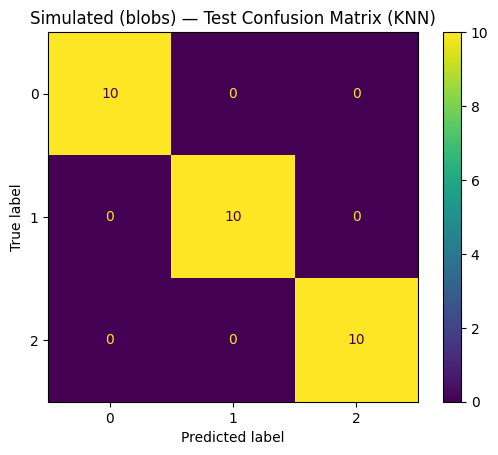

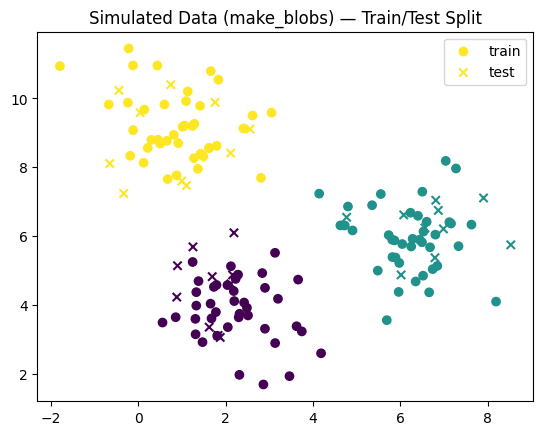

/tmp/ipython-input-3929216540.py:64: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(Xb_test[:,0],  Xb_test[:,1],  c=yb_test,  marker='x', edgecolor='k', label='test')


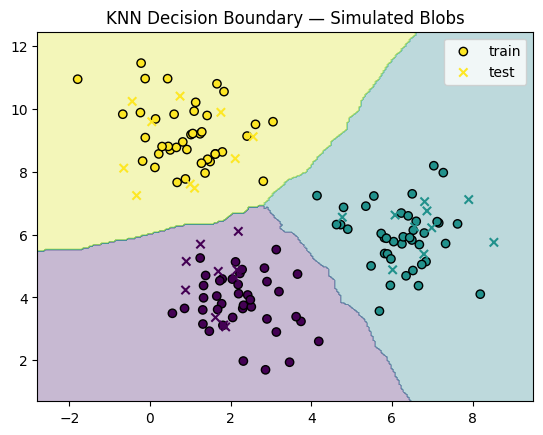

In [7]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

centers = [[2, 4], [6, 6], [1, 9]]
n_classes = len(centers)
data, labels = make_blobs(n_samples=150,
                          centers=np.array(centers),
                          random_state=1)

# Step 2
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# 1) 80/20 split
Xb_train, Xb_test, yb_train, yb_test = train_test_split(
    data, labels,
    train_size=0.8, test_size=0.2,
    random_state=12, stratify=labels
)

#  train & evaluate
knn_b = KNeighborsClassifier()
knn_b.fit(Xb_train, yb_train)

yb_pred_train = knn_b.predict(Xb_train)
yb_pred_test  = knn_b.predict(Xb_test)

train_acc = accuracy_score(yb_train, yb_pred_train)
test_acc  = accuracy_score(yb_test,  yb_pred_test)

print("Blobs — KNN (default)")
print(f"  Train accuracy: {train_acc:.3f}")
print(f"  Test  accuracy: {test_acc:.3f}")

# Confusion matrix on test set
cm = confusion_matrix(yb_test, yb_pred_test, labels=knn_b.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Simulated (blobs) — Test Confusion Matrix (KNN)")
plt.show()

#  Scatter plot of train vs test points
plt.figure()
plt.scatter(Xb_train[:,0], Xb_train[:,1], c=yb_train, marker='o', label='train')
plt.scatter(Xb_test[:,0],  Xb_test[:,1],  c=yb_test,  marker='x', label='test')
plt.title("Simulated Data (make_blobs) — Train/Test Split")
plt.legend()
plt.show()

#  Decision boundary
h = 0.05  # grid step
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn_b.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(Xb_train[:,0], Xb_train[:,1], c=yb_train, marker='o', edgecolor='k', label='train')
plt.scatter(Xb_test[:,0],  Xb_test[:,1],  c=yb_test,  marker='x', edgecolor='k', label='test')
plt.title("KNN Decision Boundary — Simulated Blobs")
plt.legend()
plt.show()


